['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


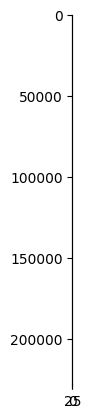

In [11]:
# data
from tinygrad import Tensor, TinyJit
import matplotlib.pyplot as plt
%matplotlib inline

words = open('names.txt', 'r').read().splitlines()
print(words[:10])

# tokenize dataset
encode = { c:i+1 for i,c in enumerate(sorted(list(set(''.join(words))))) }
encode['.'] = 0
decode = { i:c for c,i in encode.items() }

X, Y = [], []
for w in words:
    w_normd = ['.'] + list(w) + ['.']
    for x, y in zip(w_normd, w_normd[1:]):
        X.append(encode[x])
        Y.append(encode[y])

Xe, Ye = Tensor(X).one_hot(27).float(), Tensor(Y).one_hot(27)
plt.imshow(Xe.numpy())

In [2]:
# model
Tensor.manual_seed(2147483647)
W = Tensor.randn(27, 27, requires_grad=True) # 27 logits

In [6]:
# training
@TinyJit
def step():
    for _ in range(10):
        # forward
        logits = Xe @ W # (5, 27) @ (27, 27) -> (5, 27) nn tames exponentials better than bigram (see papers)
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True) # likelihood via softmax
        loss = -probs[Tensor.arange(len(logits)), Y].log().mean() # nll
        print(loss.numpy())

        # backward
        W.grad = None
        loss.backward()

        # update
        # need to detach, bc .assign rejects x st x.requires_grad=True. see tensor.py L254
        W.assign((W - 50 * W.grad).detach())

step()

3.697216
3.3556702
3.135677
2.9953113
2.903509
2.8366895
2.7864623
2.748448
2.7199106
2.6957235


In [12]:
# inference
import numpy as np

for _ in range(10):
    out = []
    i = 0
    while True:
        # p = P[i]
        # i = np.random.choice(range(27), p=p.numpy()).item()
        # out.append(decode[i])

        # forward
        xe = Tensor([i]).one_hot(27).float()
        logits = xe @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True)

        # sample
        i = np.random.choice(range(27), p=probs.numpy().squeeze())
        out.append(decode[i])
        if i == 0: break

    print(''.join(out))

jah.
ja.
kannn.
kayruqerarmban.
pke.
ran.
ga.
pidrylla.
cza.
agucn.
